<a href="https://colab.research.google.com/github/francieric/BootCamp_Alura/blob/main/Desafio01_Francieric_Alves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Estudante: Franciéric Alves de Araújo - eric@ifpi.edu.br
## Resumo da análise do Dataset de óbitos registrados no cartório civil.


*   Verificar mortes no início e no final de 2019 (ano mais recente antes da COVID 19) nas unidades da federação e verificar em quais Estados houve aumento ou diminuição do número de mortes.
*   Verificar mortes no início de 2020 e em junho de 2020 (mês mais recente com dados populacionais) nas unidades da federação e comparar com o mesmo período do ano anterior (antes da COVID 19 no Brasil) e verificar o quão impactante foi o COVID 19 para esses números de óbitos.
*   Adicionar o campo Região e analisar o número mortes por região, comparando esses dados em junho de 2019 e 2020.
*   Adicionar o campo população com base no Dataset de estimativa populacional do IBGE para os meses estudados acima, como forma de achar o indice mais representativo observando a relação entre mortes e população.
*   Com base no índice acima refazer os estudos iniciais para 2019 e 2020 verificando se houve uma mudança no cenário.
*  Como Trabalhos Futuros temos:

>>1.   Cruzar com o DataSet do casos de COVID-19 baixadas do projeto BRASIL.IO para verificar se as inferências em relação ao aumento/diminuição no mês de Junho de 2020 em relação a Junho de 2019 estarão condizentes com a curva do número de casos e óbitos por Covid 19 em Roraima e Acre(aumento do número de óbitos), além de Mato Grosso do Sul e Rondônia (diminuição do número de óbitos).




## Análise dos dados:
### **Vamos analisar o Dataset de número de óbitos no registro civil.**

In [146]:
#Lendo os dados
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/obitos-registro-civil.csv')
dados.tail()

,year,month,state,deaths
15025,2020,8,RR,86
15026,2020,8,SC,4666
15027,2020,8,SP,31782
15028,2020,8,SE,1452
15029,2020,8,TO,741


In [147]:
#acessando o google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
#Renomeando colunas do DataFrame para facilitar o entendimento.
dados.columns=['Ano','Mes','UF','Mortes']
dados.head()

,Ano,Mes,UF,Mortes
0,1970,1,AM,1
1,1970,1,BA,6
2,1970,1,CE,9
3,1970,1,DF,52
4,1970,1,ES,65


In [149]:
#Verificando o tipo dos dados do Dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15030 entries, 0 to 15029
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ano     15030 non-null  int64 
 1   Mes     15030 non-null  int64 
 2   UF      15030 non-null  object
 3   Mortes  15030 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 469.8+ KB


### Foi a adicionada a coluna período unindo meses/anos. Essa coluna será importante para composição das consultas e exibição nos gráficos.

In [150]:
#Adicionando a Coluna 
dados["periodo"] = dados["Ano"].astype(str) +"/"+ +dados["Mes"].astype(str)
dados

,Ano,Mes,UF,Mortes,periodo
0,1970,1,AM,1,1970/1
1,1970,1,BA,6,1970/1
2,1970,1,CE,9,1970/1
3,1970,1,DF,52,1970/1
4,1970,1,ES,65,1970/1
...,...,...,...,...,...
15025,2020,8,RR,86,2020/8
15026,2020,8,SC,4666,2020/8
15027,2020,8,SP,31782,2020/8
15028,2020,8,SE,1452,2020/8


### Vamos verificar o número de óbitos em janeiro e dezembro de 2019, ano mais recente antes da COVID 19, nas unidades da federação e observar a variação desses números entre os anos e identificar se em algum estado houve aumento significativo. Podendo indicar uma possível presença da doença nesses Estados.

In [151]:
# Seleções do período de estudos - Inicio e FIM de 2019
selecao_inicio_2019=dados.query('periodo=="2019/1"')
selecao_inicio_2019 = selecao_inicio_2019.sort_values("Mortes",ascending=False)
selecao_inicio_2019

,Ano,Mes,UF,Mortes,periodo
14514,2019,1,SP,27846,2019/1
14508,2019,1,RJ,12586,2019/1
14502,2019,1,MG,11329,2019/1
14510,2019,1,RS,7198,2019/1
14494,2019,1,BA,6564,2019/1
14505,2019,1,PR,5979,2019/1
14506,2019,1,PE,5143,2019/1
14513,2019,1,SC,3623,2019/1
14495,2019,1,CE,3614,2019/1
14498,2019,1,GO,2947,2019/1


In [152]:
# Seleções do período de estudos - Inicio e FIM de 2019
selecao_fim_2019=dados.query('periodo=="2019/12"')
selecao_fim_2019 = selecao_fim_2019.sort_values("Mortes",ascending=False)
selecao_fim_2019

,Ano,Mes,UF,Mortes,periodo
14811,2019,12,SP,22863,2019/12
14805,2019,12,RJ,12161,2019/12
14799,2019,12,MG,9735,2019/12
14807,2019,12,RS,7055,2019/12
14802,2019,12,PR,5700,2019/12
14791,2019,12,BA,5538,2019/12
14803,2019,12,PE,5267,2019/12
14792,2019,12,CE,3466,2019/12
14810,2019,12,SC,3157,2019/12
14795,2019,12,GO,2718,2019/12


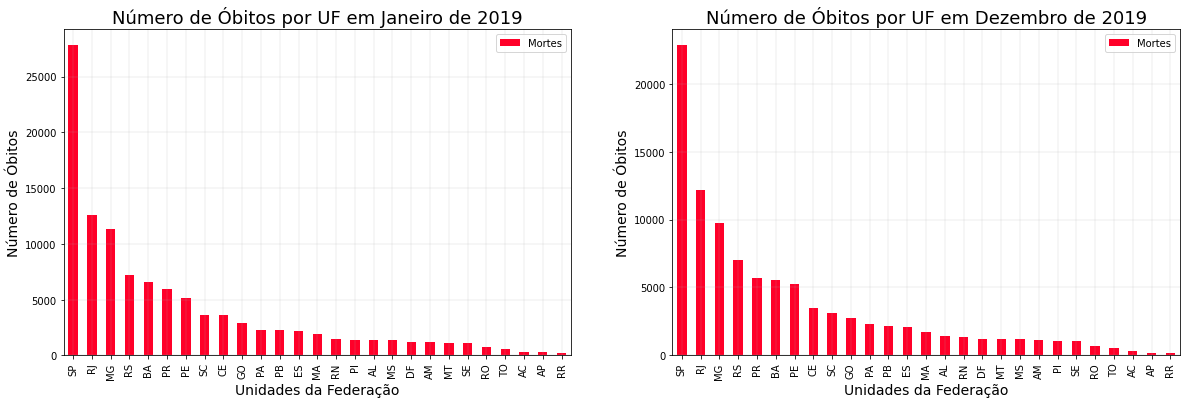

In [153]:
# Gráficos com o número de óbitos de Janeiro e Dezembro de 2019 por UF
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1,2, figsize=(20,6))

selecao_inicio_2019.plot(x="UF", y='Mortes', kind='bar', ax=axes[0],cmap='gist_rainbow')
axes[0].set_xlabel('Unidades da Federação', fontsize = 14)
axes[0].set_ylabel('Número de Óbitos', fontsize = 14)
axes[0].set_title("Número de Óbitos por UF em Janeiro de 2019", fontsize = 18)
axes[0].grid(linestyle='-', linewidth=0.2)

selecao_fim_2019.plot(x="UF", y='Mortes', kind='bar', ax=axes[1],cmap='gist_rainbow')
axes[1].set_xlabel('Unidades da Federação', fontsize = 14)
axes[1].set_ylabel('Número de Óbitos', fontsize = 14)
axes[1].set_title("Número de Óbitos por UF em Dezembro de 2019", fontsize = 18)
axes[1].grid(linestyle='-', linewidth=0.2)

plt.show()


### Observando o gráfico é possível perceber que boa parte dos estados mantiveram o número de óbitos próximo e em alguns estados houve um decréscimo nesse quantitativo, como por exemplo São Paulo. Diante desses números não é possível supor ou ter um indicativo de que o COVID 19 já estaria presente e causando mais mortes no País.

### Vamos fazer uma análise considerando o primeiro semestre de 2020, de janeiro a junho, e vamos comparar com os mesmos meses do ano anterior (antes da COVID 19 no Brasil) e verificar o quão impactante foi o COVID 19 para esses números de óbitos.

In [154]:
#Fazendo as consultas por periodo
selecao_inicio_2020=dados.query('periodo=="2020/1"')
selecao_inicio_2020 = selecao_inicio_2020.sort_values("Mortes",ascending=False)
selecao_inicio_2020

,Ano,Mes,UF,Mortes,periodo
14838,2020,1,SP,28502,2020/1
14832,2020,1,RJ,12232,2020/1
14826,2020,1,MG,11370,2020/1
14834,2020,1,RS,7479,2020/1
14818,2020,1,BA,6854,2020/1
14829,2020,1,PR,5839,2020/1
14830,2020,1,PE,5390,2020/1
14837,2020,1,SC,3797,2020/1
14819,2020,1,CE,3668,2020/1
14822,2020,1,GO,3016,2020/1


In [155]:
#Fazendo as consultas por periodo
selecao_junho_2019=dados.query('periodo=="2019/6"')
selecao_junho_2019 = selecao_junho_2019.sort_values("Mortes",ascending=False)
selecao_junho_2019

,Ano,Mes,UF,Mortes,periodo
14649,2019,6,SP,26793,2019/6
14643,2019,6,RJ,12819,2019/6
14637,2019,6,MG,10686,2019/6
14645,2019,6,RS,7480,2019/6
14640,2019,6,PR,6045,2019/6
14629,2019,6,BA,5892,2019/6
14641,2019,6,PE,5034,2019/6
14648,2019,6,SC,3399,2019/6
14630,2019,6,CE,3350,2019/6
14633,2019,6,GO,2802,2019/6


In [156]:
#Fazendo as consultas por periodo
selecao_junho_2020=dados.query('periodo=="2020/6"')
selecao_junho_2020 = selecao_junho_2020.sort_values("Mortes",ascending=False)
selecao_junho_2020

,Ano,Mes,UF,Mortes,periodo
14973,2020,6,SP,34764,2020/6
14967,2020,6,RJ,14154,2020/6
14961,2020,6,MG,12521,2020/6
14953,2020,6,BA,8295,2020/6
14969,2020,6,RS,7702,2020/6
14965,2020,6,PE,6805,2020/6
14964,2020,6,PR,6481,2020/6
14954,2020,6,CE,5772,2020/6
14972,2020,6,SC,3637,2020/6
14962,2020,6,PA,3593,2020/6


In [157]:
#Fazendo as consultas por periodo
selecao_dupla=dados.query('periodo=="2020/6" or periodo=="2019/6"')
selecao_dupla

,Ano,Mes,UF,Mortes,periodo
14625,2019,6,AC,289,2019/6
14626,2019,6,AL,1397,2019/6
14627,2019,6,AP,229,2019/6
14628,2019,6,AM,1120,2019/6
14629,2019,6,BA,5892,2019/6
14630,2019,6,CE,3350,2019/6
14631,2019,6,DF,1293,2019/6
14632,2019,6,ES,2097,2019/6
14633,2019,6,GO,2802,2019/6
14634,2019,6,MA,1730,2019/6


In [158]:
#Fazendo as consultas por periodo
selecao_dupla["ano_uf"] = dados["Ano"].astype(str) +"/"+ +dados["UF"]
selecao_dupla

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Ano,Mes,UF,Mortes,periodo,ano_uf
14625,2019,6,AC,289,2019/6,2019/AC
14626,2019,6,AL,1397,2019/6,2019/AL
14627,2019,6,AP,229,2019/6,2019/AP
14628,2019,6,AM,1120,2019/6,2019/AM
14629,2019,6,BA,5892,2019/6,2019/BA
14630,2019,6,CE,3350,2019/6,2019/CE
14631,2019,6,DF,1293,2019/6,2019/DF
14632,2019,6,ES,2097,2019/6,2019/ES
14633,2019,6,GO,2802,2019/6,2019/GO
14634,2019,6,MA,1730,2019/6,2019/MA


In [159]:
#Fazendo as consultas por periodo
selecao_dupla=selecao_dupla.query('periodo=="2020/6" or periodo=="2019/6"')
selecao_dupla = selecao_dupla.sort_values("UF",ascending=False)
selecao_dupla

,Ano,Mes,UF,Mortes,periodo,ano_uf
14975,2020,6,TO,552,2020/6,2020/TO
14651,2019,6,TO,468,2019/6,2019/TO
14973,2020,6,SP,34764,2020/6,2020/SP
14649,2019,6,SP,26793,2019/6,2019/SP
14650,2019,6,SE,1034,2019/6,2019/SE
14974,2020,6,SE,1447,2020/6,2020/SE
14972,2020,6,SC,3637,2020/6,2020/SC
14648,2019,6,SC,3399,2019/6,2019/SC
14969,2020,6,RS,7702,2020/6,2020/RS
14645,2019,6,RS,7480,2019/6,2019/RS


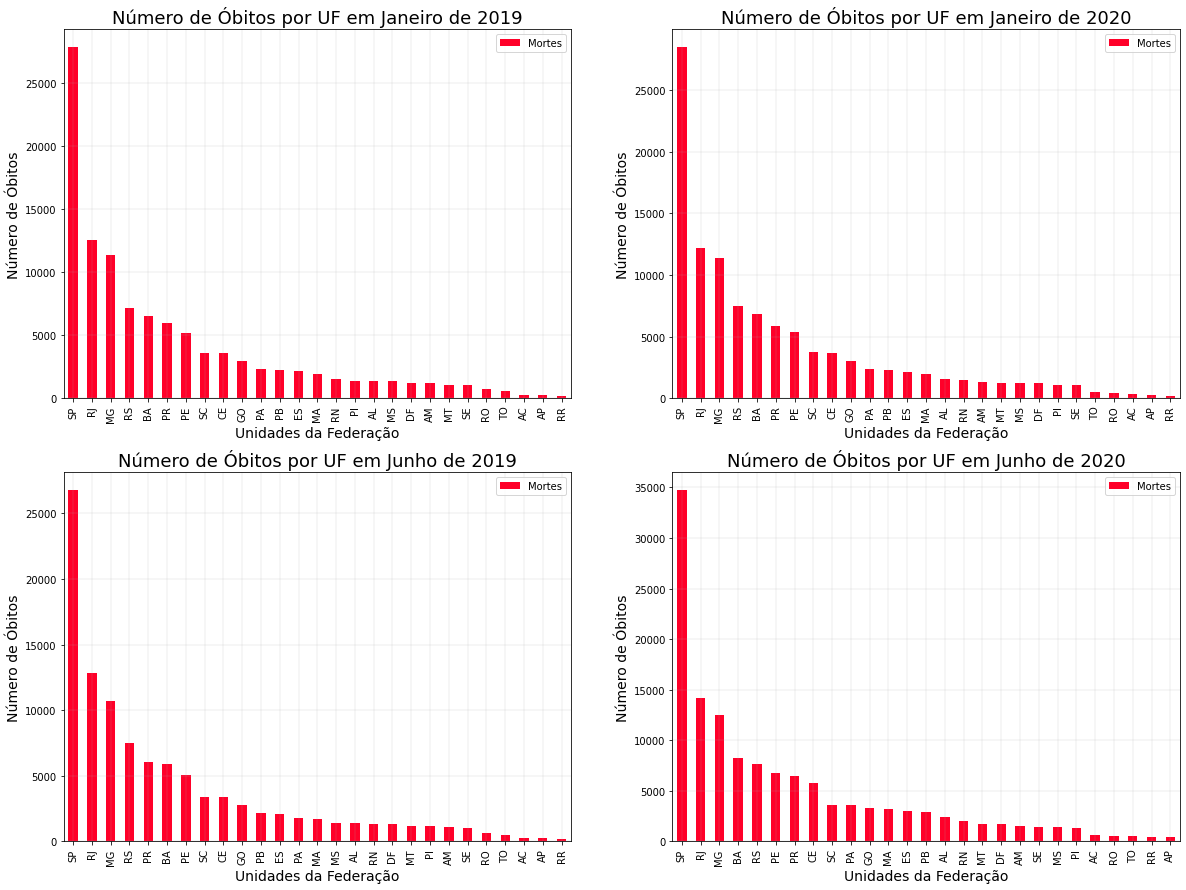

In [160]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, axes = plt.subplots(2,2, figsize=(20,6))

selecao_inicio_2019.plot(x="UF", y='Mortes', kind='bar', ax=axes[0][0],cmap='gist_rainbow')
axes[0][0].set_xlabel('Unidades da Federação', fontsize = 14)
axes[0][0].set_ylabel('Número de Óbitos', fontsize = 14)
axes[0][0].set_title("Número de Óbitos por UF em Janeiro de 2019", fontsize = 18)
axes[0][0].grid(linestyle='-', linewidth=0.2)

selecao_inicio_2020.plot(x="UF", y='Mortes', kind='bar', ax=axes[0][1],cmap='gist_rainbow')
axes[0][1].set_xlabel('Unidades da Federação', fontsize = 14)
axes[0][1].set_ylabel('Número de Óbitos', fontsize = 14)
axes[0][1].set_title("Número de Óbitos por UF em Janeiro de 2020", fontsize = 18)
axes[0][1].grid(linestyle='-', linewidth=0.2)

selecao_junho_2019.plot(x="UF", y='Mortes', kind='bar', ax=axes[1][0],cmap='gist_rainbow')
axes[1][0].set_xlabel('Unidades da Federação', fontsize = 14)
axes[1][0].set_ylabel('Número de Óbitos', fontsize = 14)
axes[1][0].set_title("Número de Óbitos por UF em Junho de 2019", fontsize = 18)
axes[1][0].grid(linestyle='-', linewidth=0.2)

selecao_junho_2020.plot(x="UF", y='Mortes', kind='bar', ax=axes[1][1],cmap='gist_rainbow')
axes[1][1].set_xlabel('Unidades da Federação', fontsize = 14)
axes[1][1].set_ylabel('Número de Óbitos', fontsize = 14)
axes[1][1].set_title("Número de Óbitos por UF em Junho de 2020", fontsize = 18)
axes[1][1].grid(linestyle='-', linewidth=0.2)
plt.subplots_adjust(bottom=-1)


plt.show()


### Analisando o Gráfico acima é possível perceber que em janeiro/20 a quantidade de óbitos permaneceu muito próxima a quantidade em janeiro/19, reforçando o indício de que em janeiro o COVID 19 ainda não estaria causando o aumento do número de mortes, o que já podemos perceber que ocorre no mês de junho. Vamos focar nossa análise mais direcionada a junho de 2019 e 2020 no próximo gráfico.

In [161]:
selecao_dupla

,Ano,Mes,UF,Mortes,periodo,ano_uf
14975,2020,6,TO,552,2020/6,2020/TO
14651,2019,6,TO,468,2019/6,2019/TO
14973,2020,6,SP,34764,2020/6,2020/SP
14649,2019,6,SP,26793,2019/6,2019/SP
14650,2019,6,SE,1034,2019/6,2019/SE
14974,2020,6,SE,1447,2020/6,2020/SE
14972,2020,6,SC,3637,2020/6,2020/SC
14648,2019,6,SC,3399,2019/6,2019/SC
14969,2020,6,RS,7702,2020/6,2020/RS
14645,2019,6,RS,7480,2019/6,2019/RS


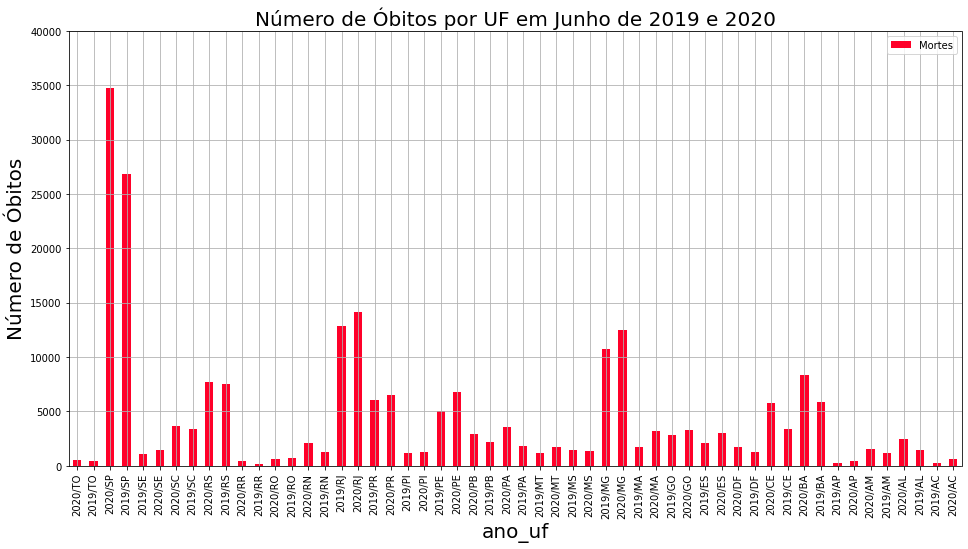

In [162]:
#Gráfico apresentando o comparativo do número de óbitos em Junho de 2019 e 2020
ax=selecao_dupla.plot(figsize=(16,8), x="ano_uf", y='Mortes', kind='bar', cmap='gist_rainbow')
ax.set_xlabel('ano_uf', fontsize = 20)
ax.set_ylabel('Número de Óbitos', fontsize = 20);
plt.title("Número de Óbitos por UF em Junho de 2019 e 2020", fontsize = 20)
plt.ylim(0,40000)
plt.grid()

plt.show()

In [189]:
# Calcular o percentual de aumento e redução por UF entre junho de 2019 e junho de 2020.
somente_2020 = selecao_dupla.query("periodo == '2020/6'").set_index("Ano")
somente_2019 = selecao_dupla.query("periodo == '2019/6'").set_index("Ano")

somente_2020 = somente_2020[["UF", "Mortes"]].sort_values("UF").set_index("UF")
somente_2019 = somente_2019[["UF", "Mortes"]].sort_values("UF").set_index("UF")
somente_2020 / somente_2019

,Mortes
UF,
AC,2.162630
AL,1.723694
AM,1.400893
AP,1.847162
BA,1.407841
CE,1.722985
DF,1.296210
ES,1.440153
GO,1.169165


### Focando no mês de junho de 2019 e 2020 podemos verificar que em praticamente todos os estados ocorreu um aumento no número de mortes, destaque para Roraima (136% de aumento) e Acre (116% de aumento), onde ocorreram os maiores aumentos de óbitos. Em Rondônia e Mato Grosso do Sul ocorreu uma queda no número de óbitos de 2019 para 2020, fato estranho e que pode ter relação com o período em que cada estado teve seu pico nos casos de COVID 19, mas precisa ser melhor investigado. Apresentaremos abaixo os gráficos mais detalhados desses estados.

In [185]:
#Consultar para exibir mais detalhadamente os pontos que chamaram atenção - Rondonia
compara = dados.query("((Ano == '2019') and (UF == 'RO') and (Mes == '6')) | ((Ano == '2020') and ((UF == 'RO')) and (Mes == '6'))").set_index('Ano')

#Removendo dados nao numericos para plotar o gráfico
compara = compara.drop("UF", axis=1)
compara = compara.drop("periodo", axis=1)

#Consultar para exibir mais detalhadamente os pontos que chamaram atenção - Mato Grosso do Sul
compara_1 = dados.query("((Ano == '2019') and (UF == 'MS') and (Mes == '6')) | ((Ano == '2020') and ((UF == 'MS')) and (Mes == '6'))").set_index('Ano')

#Removendo dados nao numericos para plotar o gráfico
compara_1 = compara_1.drop("UF", axis=1)
compara_1 = compara_1.drop("periodo", axis=1)


#Consultar para exibir mais detalhadamente os pontos que chamaram atenção - Roraima
compara_2 = dados.query("((Ano == '2019') and (UF == 'RR') and (Mes == '6')) | ((Ano == '2020') and (UF == 'RR') and (Mes == '6'))").set_index('Ano')


#Removendo dados nao numericos para plotar o gráfico
compara_2 = compara_2.drop("UF", axis=1)
compara_2 = compara_2.drop("periodo", axis=1)

compara_2

#Consultar para exibir mais detalhadamente os pontos que chamaram atenção - Acre
compara_3 = dados.query("((Ano == '2019') and (UF == 'AC') and (Mes == '6')) | ((Ano == '2020') and (UF == 'AC') and (Mes == '6'))").set_index('Ano')

#Removendo dados nao numericos para plotar o gráfico
compara_3 = compara_3.drop("UF", axis=1)
compara_3 = compara_3.drop("periodo", axis=1)

compara_3

,Mes,Mortes
Ano,,
2019,6,289
2020,6,625


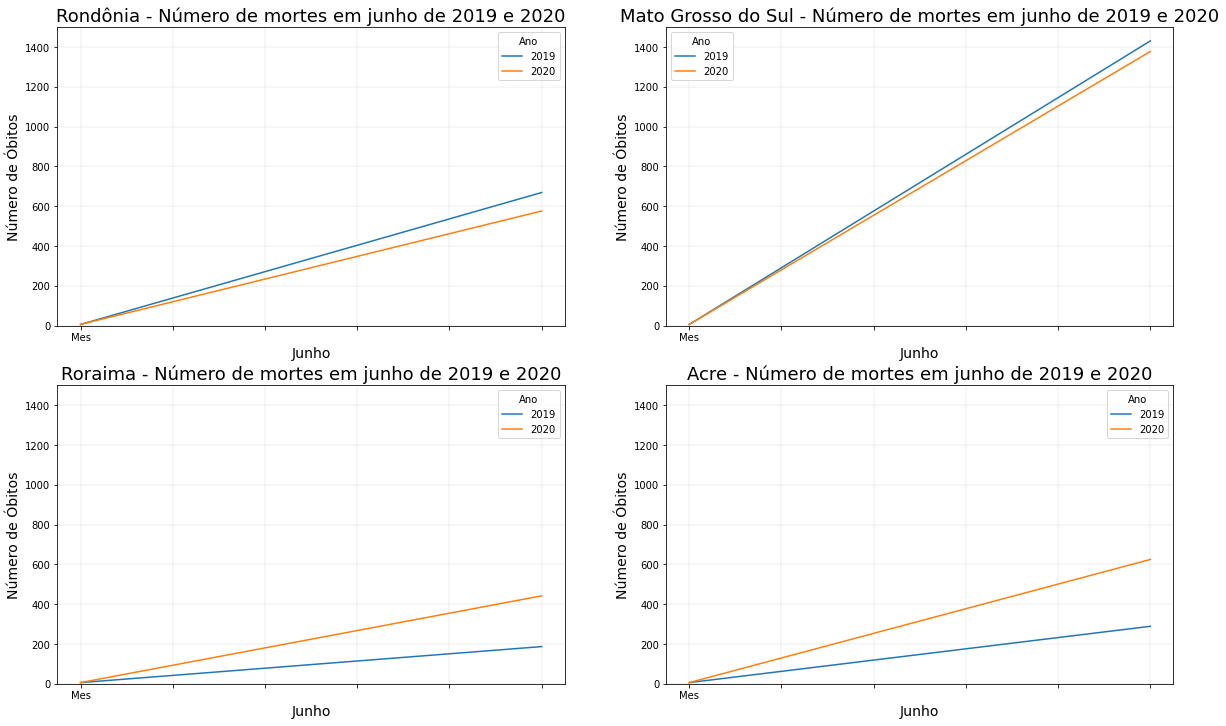

In [188]:
#Gráfico apresentando o comparativo do número de óbitos em Junho de 2019 e 2020 - 
#Destacando os Estados aonde houve redução e os que obtiveram o maior aumento.
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


fig, axes = plt.subplots(2,2, figsize=(20,4))

compara.T.plot(ax=axes[0][0])
axes[0][0].set_xlabel('Junho', fontsize = 14)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
axes[0][0].set_ylabel('Número de Óbitos', fontsize = 14)
axes[0][0].set_title("Rondônia - Número de mortes em junho de 2019 e 2020", fontsize = 18)
axes[0][0].grid(linestyle='-', linewidth=0.2)
axes[0][0].set_ylim(0,1500)

compara_1.T.plot(ax=axes[0][1])
axes[0][1].set_xlabel('Junho', fontsize = 14)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
axes[0][1].set_ylabel('Número de Óbitos', fontsize = 14)
axes[0][1].set_title("Mato Grosso do Sul - Número de mortes em junho de 2019 e 2020", fontsize = 18)
axes[0][1].grid(linestyle='-', linewidth=0.2)
axes[0][1].set_ylim(0,1500)

compara_2.T.plot(ax=axes[1][0])
axes[1][0].set_xlabel('Junho', fontsize = 14)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
axes[1][0].set_ylabel('Número de Óbitos', fontsize = 14)
axes[1][0].set_title("Roraima - Número de mortes em junho de 2019 e 2020", fontsize = 18)
axes[1][0].grid(linestyle='-', linewidth=0.2)
axes[1][0].set_ylim(0,1500)

compara_3.T.plot(ax=axes[1][1])
axes[1][1].set_xlabel('Junho', fontsize = 14)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
axes[1][1].set_ylabel('Número de Óbitos', fontsize = 14)
axes[1][1].set_title("Acre - Número de mortes em junho de 2019 e 2020", fontsize = 18)
axes[1][1].grid(linestyle='-', linewidth=0.2)
axes[1][1].set_ylim(0,1500)


plt.subplots_adjust(bottom=-1.4)
plt.show()

### **Agora, vamos analisar por região.** 

In [166]:
#Fazendo uma copia do DataFrame
dados_com_regiao=dados.copy()
dados_com_regiao

,Ano,Mes,UF,Mortes,periodo
0,1970,1,AM,1,1970/1
1,1970,1,BA,6,1970/1
2,1970,1,CE,9,1970/1
3,1970,1,DF,52,1970/1
4,1970,1,ES,65,1970/1
...,...,...,...,...,...
15025,2020,8,RR,86,2020/8
15026,2020,8,SC,4666,2020/8
15027,2020,8,SP,31782,2020/8
15028,2020,8,SE,1452,2020/8


In [167]:
#Criando a coluna região para analises regionais.
dados_com_regiao['Regiao'] = ''
for index, row in dados_com_regiao.iterrows():
  if (row['UF'] == "MA") | (row['UF'] == "PI") | (row['UF'] == "CE")| (row['UF'] == "RN")| (row['UF'] == "PB")| (row['UF'] == "PE")| (row['UF'] == "AL")| (row['UF'] == "SE")| (row['UF'] == "BA"):
      dados_com_regiao.loc[index,'Regiao'] = 'NORDESTE'
  elif (row['UF'] == "RO")|(row['UF'] == "AC")|(row['UF'] == "AM")|(row['UF'] == "RR")|(row['UF'] == "PA")|(row['UF'] == "AP")|(row['UF'] == "TO"):
      dados_com_regiao.loc[index,'Regiao'] = 'NORTE'
  elif (row['UF'] == "MG")|(row['UF'] == "ES")|(row['UF'] == "RJ")|(row['UF'] == "SP"):
      dados_com_regiao.loc[index,'Regiao'] = 'SUDESTE'
  elif (row['UF'] == "PR")|(row['UF'] == "SC")|(row['UF'] == "RS"):
      dados_com_regiao.loc[index,'Regiao'] = 'SUL'
  elif (row['UF'] == "MS")|(row['UF'] == "MT")|(row['UF'] == "GO")|(row['UF'] == "DF"):
      dados_com_regiao.loc[index,'Regiao'] = 'CENTRO-OESTE'
dados_com_regiao.head(100)

,Ano,Mes,UF,Mortes,periodo,Regiao
0,1970,1,AM,1,1970/1,NORTE
1,1970,1,BA,6,1970/1,NORDESTE
2,1970,1,CE,9,1970/1,NORDESTE
3,1970,1,DF,52,1970/1,CENTRO-OESTE
4,1970,1,ES,65,1970/1,SUDESTE
...,...,...,...,...,...,...
95,1970,6,PR,1236,1970/6,SUL
96,1970,6,PE,1825,1970/6,NORDESTE
97,1970,6,RJ,42,1970/6,SUDESTE
98,1970,6,RN,30,1970/6,NORDESTE


### A Ideia é obter e analisar gráficos por região, analisando os números inter-regiões e também uma forma de verificar quais dessas regiões tiveram um maior impacto com o COVID 19, no aumento do número de óbitos, comparando os primeiros semestres de 2019 e 2020.

In [168]:
# Fazendo as selecoes por região e periodo - 2020
selecao_junho_2020_sudeste=dados_com_regiao.query('periodo=="2020/6" and Regiao=="SUDESTE"')
selecao_junho_2020_sudeste = selecao_junho_2020_sudeste.sort_values("Mortes",ascending=False)
selecao_junho_2020_nordeste=dados_com_regiao.query('periodo=="2020/6" and Regiao=="NORDESTE"')
selecao_junho_2020_nordeste = selecao_junho_2020_nordeste.sort_values("Mortes",ascending=False)
selecao_junho_2020_sul=dados_com_regiao.query('periodo=="2020/6" and Regiao=="SUL"')
selecao_junho_2020_sul = selecao_junho_2020_sul.sort_values("Mortes",ascending=False)
selecao_junho_2020_norte=dados_com_regiao.query('periodo=="2020/6" and Regiao=="NORTE"')
selecao_junho_2020_norte = selecao_junho_2020_norte.sort_values("Mortes",ascending=False)
selecao_junho_2020_centro_oeste=dados_com_regiao.query('periodo=="2020/6" and Regiao=="CENTRO-OESTE"')
selecao_junho_2020_centro_oeste = selecao_junho_2020_centro_oeste.sort_values("Mortes",ascending=False)
selecao_junho_2020_centro_oeste

,Ano,Mes,UF,Mortes,periodo,Regiao
14957,2020,6,GO,3276,2020/6,CENTRO-OESTE
14959,2020,6,MT,1761,2020/6,CENTRO-OESTE
14955,2020,6,DF,1676,2020/6,CENTRO-OESTE
14960,2020,6,MS,1378,2020/6,CENTRO-OESTE


In [169]:
# Fazendo as selecoes por região e periodo - 2019
selecao_junho_2019_sudeste=dados_com_regiao.query('periodo=="2019/6" and Regiao=="SUDESTE"')
selecao_junho_2019_sudeste = selecao_junho_2019_sudeste.sort_values("Mortes",ascending=False)
selecao_junho_2019_nordeste=dados_com_regiao.query('periodo=="2019/6" and Regiao=="NORDESTE"')
selecao_junho_2019_nordeste = selecao_junho_2019_nordeste.sort_values("Mortes",ascending=False)
selecao_junho_2019_sul=dados_com_regiao.query('periodo=="2019/6" and Regiao=="SUL"')
selecao_junho_2019_sul = selecao_junho_2019_sul.sort_values("Mortes",ascending=False)
selecao_junho_2019_norte=dados_com_regiao.query('periodo=="2019/6" and Regiao=="NORTE"')
selecao_junho_2019_norte = selecao_junho_2019_norte.sort_values("Mortes",ascending=False)
selecao_junho_2019_centro_oeste=dados_com_regiao.query('periodo=="2019/6" and Regiao=="CENTRO-OESTE"')
selecao_junho_2019_centro_oeste = selecao_junho_2019_centro_oeste.sort_values("Mortes",ascending=False)
selecao_junho_2019_centro_oeste

,Ano,Mes,UF,Mortes,periodo,Regiao
14633,2019,6,GO,2802,2019/6,CENTRO-OESTE
14636,2019,6,MS,1431,2019/6,CENTRO-OESTE
14631,2019,6,DF,1293,2019/6,CENTRO-OESTE
14635,2019,6,MT,1190,2019/6,CENTRO-OESTE


In [190]:
# Fazendo o somatório por região em 6/2020.
junho_2020_por_regiao = dados_com_regiao.query("periodo == '2020/6'")
junho_2020_por_regiao = junho_2020_por_regiao.groupby(['Regiao'])['Mortes'].sum().reset_index()
junho_2020_por_regiao

,Regiao,Mortes
0,CENTRO-OESTE,8091
1,NORDESTE,34211
2,NORTE,7780
3,SUDESTE,64459
4,SUL,17820


In [191]:
# Fazendo o somatório por região em 6/2019.
junho_2019_por_regiao = dados_com_regiao.query("periodo == '2019/6'")
junho_2019_por_regiao = junho_2019_por_regiao.groupby(['Regiao'])['Mortes'].sum().reset_index()
junho_2019_por_regiao

,Regiao,Mortes
0,CENTRO-OESTE,6716
1,NORDESTE,23093
2,NORTE,4758
3,SUDESTE,52395
4,SUL,16924


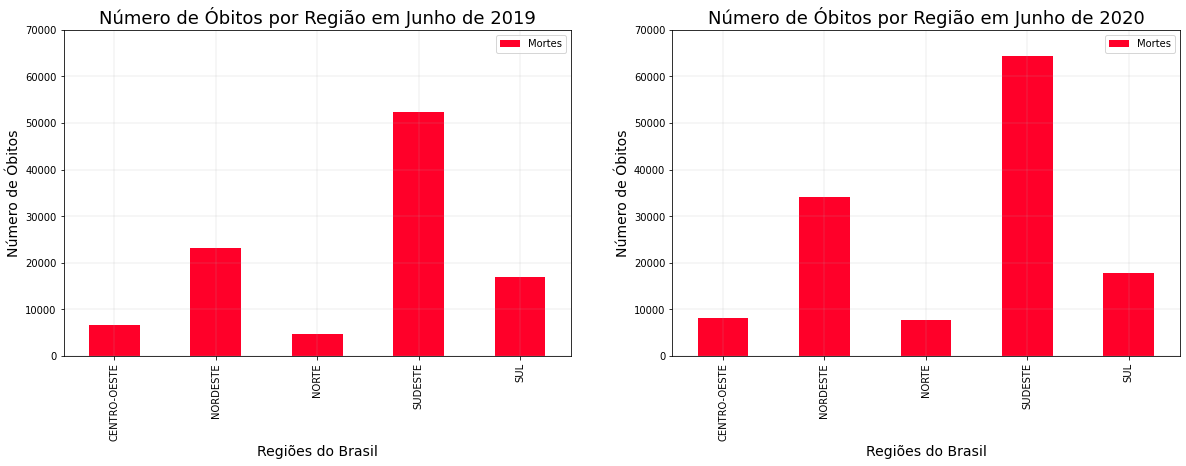

In [172]:
# Grafico Óbitos por região e por determinado ano/mes
fig, axes = plt.subplots(1,2, figsize=(20,6))

junho_2019_por_regiao.plot(x="Regiao", y='Mortes', kind='bar', ax=axes[0],cmap='gist_rainbow')
axes[0].set_xlabel('Regiões do Brasil', fontsize = 14)
axes[0].set_ylabel('Número de Óbitos', fontsize = 14)
axes[0].set_title("Número de Óbitos por Região em Junho de 2019", fontsize = 18)
axes[0].grid(linestyle='-', linewidth=0.2)
axes[0].set_ylim(0,70000)

junho_2020_por_regiao.plot(x="Regiao", y='Mortes', kind='bar', ax=axes[1],cmap='gist_rainbow')
axes[1].set_xlabel('Regiões do Brasil', fontsize = 14)
axes[1].set_ylabel('Número de Óbitos', fontsize = 14)
axes[1].set_title("Número de Óbitos por Região em Junho de 2020", fontsize = 18)
axes[1].grid(linestyle='-', linewidth=0.2)
plt.ylim(0,70000)


plt.show()


### **Analisando o Fator População**

### Um ponto importante nesses comparativos é a diferença populacional entre os estados o que faz com que uma simples comparação direta do número de mortes, sem considerar a questão populacional, induza a conclusões falhas. Vamos calcular o índice de óbitos por 100.000 habitantes e para isso precisamos adicionar as informações populacionais. Adicionaremos os datasets com a estimativa populacional em junho de 2019 e 2020, disponíveis no IBGE.

In [192]:
#Preparando DataFrame para receber os dados populacionais de 6/2019
dados_com_pop = dados_com_regiao.copy()
dados_com_pop.set_index("UF",inplace = True)
dados_com_pop_2019 = dados_com_pop.query("periodo == '2019/6'")
dados_com_pop_2019

,Ano,Mes,Mortes,periodo,Regiao
UF,,,,,
AC,2019,6,289,2019/6,NORTE
AL,2019,6,1397,2019/6,NORDESTE
AP,2019,6,229,2019/6,NORTE
AM,2019,6,1120,2019/6,NORTE
BA,2019,6,5892,2019/6,NORDESTE
CE,2019,6,3350,2019/6,NORDESTE
DF,2019,6,1293,2019/6,CENTRO-OESTE
ES,2019,6,2097,2019/6,SUDESTE
GO,2019,6,2802,2019/6,CENTRO-OESTE


In [193]:
#Preparando DataFrame para receber os dados populacionais de 6/2020
dados_com_pop_2020 = dados_com_regiao.copy()
dados_com_pop_2020.set_index("UF",inplace = True)
dados_com_pop_2020 = dados_com_pop.query("periodo == '2020/6'")
dados_com_pop_2020

,Ano,Mes,Mortes,periodo,Regiao
UF,,,,,
AC,2020,6,625,2020/6,NORTE
AL,2020,6,2408,2020/6,NORDESTE
AP,2020,6,423,2020/6,NORTE
AM,2020,6,1569,2020/6,NORTE
BA,2020,6,8295,2020/6,NORDESTE
CE,2020,6,5772,2020/6,NORDESTE
DF,2020,6,1676,2020/6,CENTRO-OESTE
ES,2020,6,3020,2020/6,SUDESTE
GO,2020,6,3276,2020/6,CENTRO-OESTE


In [194]:
#importando dados da estimativa populacional do dataset do IBGE 6/2019
dados_populacao_2019 = pd.read_csv("/content/drive/My Drive/bootcamp/estimativa_dou_2019.csv",encoding="ISO-8859-1",
                              skiprows=2, skipfooter = 7, thousands=".", sep = ";", engine = "python")

dados_populacao_2019.dropna(axis=1,inplace=True)

dados_populacao_2019.columns =["UF", "Populacao"]

dados_populacao_2019.set_index("UF",inplace = True)
dados_populacao_2019.drop(labels = ["Região Norte","Região Sul", "Região Nordeste", "Região Sudeste", "Região Centro-Oeste"], 
                     axis = 0, inplace= True)

dados_populacao_2019




,Populacao
UF,
RO,1777225
AC,881935
AM,4144597
RR,605761
PA,8602865
AP,845731
TO,1572866
MA,7075181
PI,3273227


In [195]:
#importando dados da estimativa populacional do dataset do IBGE 6/2019
dados_populacao_2020 = pd.read_csv("/content/drive/My Drive/bootcamp/estimativa_dou_2020.csv",encoding="ISO-8859-1",
                              skiprows=2, skipfooter = 7, thousands=".", sep = ";", engine = "python")

dados_populacao_2020.dropna(axis=1,inplace=True)

dados_populacao_2020.columns =["UF", "Populacao"]

dados_populacao_2020.set_index("UF",inplace = True)
dados_populacao_2020.drop(labels = ["Região Norte","Região Sul", "Região Nordeste", "Região Sudeste", "Região Centro-Oeste"], 
                     axis = 0, inplace= True)

dados_populacao_2020

,Populacao
UF,
RO,1796460
AC,894470
AM,4207714
RR,631181
PA,8690745
AP,861773
TO,1590248
MA,7114598
PI,3281480


In [196]:
#Inserindo os dados da populacao no DataFrame de obitos atraves de um merge com UF como chave -- 2020
dados_com_pop_2020 = pd.merge(left = dados_com_pop_2020,right = dados_populacao_2020, on = "UF", how = "left")
dados_com_pop_2020

,Ano,Mes,Mortes,periodo,Regiao,Populacao
UF,,,,,,
AC,2020,6,625,2020/6,NORTE,894470
AL,2020,6,2408,2020/6,NORDESTE,3351543
AP,2020,6,423,2020/6,NORTE,861773
AM,2020,6,1569,2020/6,NORTE,4207714
BA,2020,6,8295,2020/6,NORDESTE,14930634
CE,2020,6,5772,2020/6,NORDESTE,9187103
DF,2020,6,1676,2020/6,CENTRO-OESTE,3055149
ES,2020,6,3020,2020/6,SUDESTE,4064052
GO,2020,6,3276,2020/6,CENTRO-OESTE,7113540


In [197]:
#Inserindo os dados da populacao no DataFrame de obitos atraves de um merge com UF como chave -- 2019
dados_com_pop_2019 = pd.merge(left = dados_com_pop_2019,right = dados_populacao_2019, on = "UF", how = "left")
dados_com_pop_2019

,Ano,Mes,Mortes,periodo,Regiao,Populacao
UF,,,,,,
AC,2019,6,289,2019/6,NORTE,881935
AL,2019,6,1397,2019/6,NORDESTE,3337357
AP,2019,6,229,2019/6,NORTE,845731
AM,2019,6,1120,2019/6,NORTE,4144597
BA,2019,6,5892,2019/6,NORDESTE,14873064
CE,2019,6,3350,2019/6,NORDESTE,9132078
DF,2019,6,1293,2019/6,CENTRO-OESTE,3015268
ES,2019,6,2097,2019/6,SUDESTE,4018650
GO,2019,6,2802,2019/6,CENTRO-OESTE,7018354


In [198]:
dados_com_pop_2019

,Ano,Mes,Mortes,periodo,Regiao,Populacao
UF,,,,,,
AC,2019,6,289,2019/6,NORTE,881935
AL,2019,6,1397,2019/6,NORDESTE,3337357
AP,2019,6,229,2019/6,NORTE,845731
AM,2019,6,1120,2019/6,NORTE,4144597
BA,2019,6,5892,2019/6,NORDESTE,14873064
CE,2019,6,3350,2019/6,NORDESTE,9132078
DF,2019,6,1293,2019/6,CENTRO-OESTE,3015268
ES,2019,6,2097,2019/6,SUDESTE,4018650
GO,2019,6,2802,2019/6,CENTRO-OESTE,7018354


In [199]:
#Calculando o Indice de óbitos por 100k hab. - 2019
dados_com_pop_2019["ind_100k_hab"] = dados_com_pop_2019["Mortes"]/(dados_com_pop_2019["Populacao"]/100000)
dados_com_pop_2019

,Ano,Mes,Mortes,periodo,Regiao,Populacao,ind_100k_hab
UF,,,,,,,
AC,2019,6,289,2019/6,NORTE,881935,32.768855
AL,2019,6,1397,2019/6,NORDESTE,3337357,41.859471
AP,2019,6,229,2019/6,NORTE,845731,27.077168
AM,2019,6,1120,2019/6,NORTE,4144597,27.023134
BA,2019,6,5892,2019/6,NORDESTE,14873064,39.615240
CE,2019,6,3350,2019/6,NORDESTE,9132078,36.683874
DF,2019,6,1293,2019/6,CENTRO-OESTE,3015268,42.881760
ES,2019,6,2097,2019/6,SUDESTE,4018650,52.181703
GO,2019,6,2802,2019/6,CENTRO-OESTE,7018354,39.923891


In [200]:
#Calculando o Indice de óbitos por 100k hab. - 2019
dados_com_pop_2020["ind_100k_hab"] = dados_com_pop_2020["Mortes"]/(dados_com_pop_2020["Populacao"]/100000)
dados_com_pop_2020

,Ano,Mes,Mortes,periodo,Regiao,Populacao,ind_100k_hab
UF,,,,,,,
AC,2020,6,625,2020/6,NORTE,894470,69.873780
AL,2020,6,2408,2020/6,NORDESTE,3351543,71.847504
AP,2020,6,423,2020/6,NORTE,861773,49.084852
AM,2020,6,1569,2020/6,NORTE,4207714,37.288656
BA,2020,6,8295,2020/6,NORDESTE,14930634,55.556917
CE,2020,6,5772,2020/6,NORDESTE,9187103,62.827205
DF,2020,6,1676,2020/6,CENTRO-OESTE,3055149,54.858208
ES,2020,6,3020,2020/6,SUDESTE,4064052,74.310073
GO,2020,6,3276,2020/6,CENTRO-OESTE,7113540,46.053020


In [201]:
#Resetando os indices
dados_com_pop_2019.reset_index(inplace=True)
dados_com_pop_2020.reset_index(inplace=True)

In [202]:
#ordenando de forma descrescente
dados_com_pop_2019=dados_com_pop_2019.sort_values("ind_100k_hab",ascending=False)
dados_com_pop_2020=dados_com_pop_2020.sort_values("ind_100k_hab",ascending=False)
dados_com_pop_2019

,UF,Ano,Mes,Mortes,periodo,Regiao,Populacao,ind_100k_hab
18,RJ,2019,6,12819,2019/6,SUDESTE,17264943,74.248725
20,RS,2019,6,7480,2019/6,SUL,11377239,65.745301
24,SP,2019,6,26793,2019/6,SUDESTE,45919049,58.348334
14,PB,2019,6,2172,2019/6,NORDESTE,4018127,54.055036
15,PR,2019,6,6045,2019/6,SUL,11433957,52.868836
16,PE,2019,6,5034,2019/6,NORDESTE,9557071,52.673042
7,ES,2019,6,2097,2019/6,SUDESTE,4018650,52.181703
11,MS,2019,6,1431,2019/6,CENTRO-OESTE,2778986,51.493602
12,MG,2019,6,10686,2019/6,SUDESTE,21168791,50.479973
23,SC,2019,6,3399,2019/6,SUL,7164788,47.440343


### **Comparando os Gráficos do número de óbitos de forma absoluta e índice de 100k habitantes nos meses de junho de 2019 e 2020.** 

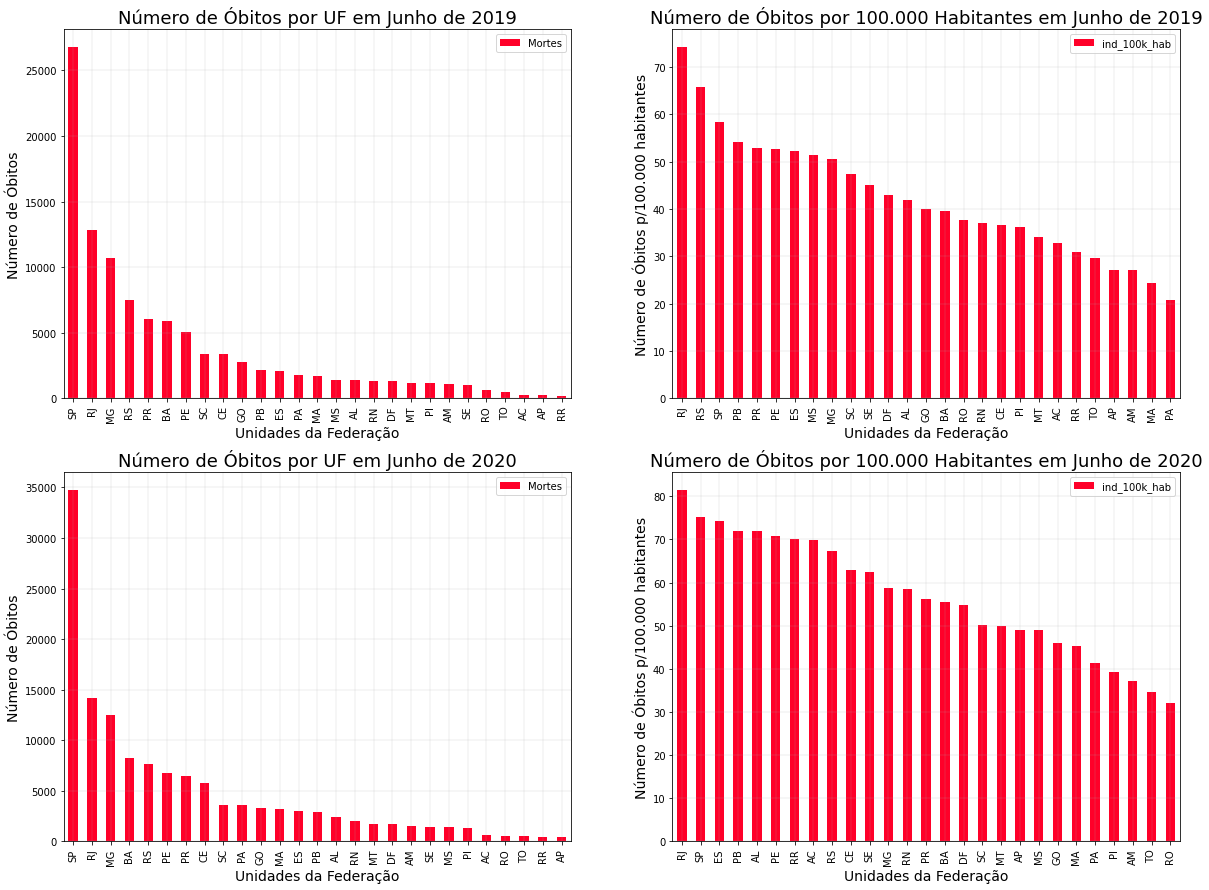

In [204]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, axes = plt.subplots(2,2, figsize=(20,6))

selecao_junho_2019.plot(x="UF", y='Mortes', kind='bar', ax=axes[0][0],cmap='gist_rainbow')
axes[0][0].set_xlabel('Unidades da Federação', fontsize = 14)
axes[0][0].set_ylabel('Número de Óbitos', fontsize = 14)
axes[0][0].set_title("Número de Óbitos por UF em Junho de 2019", fontsize = 18)
axes[0][0].grid(linestyle='-', linewidth=0.2)

dados_com_pop_2019.plot(x="UF", y='ind_100k_hab', kind='bar', ax=axes[0][1],cmap='gist_rainbow')
axes[0][1].set_xlabel('Unidades da Federação', fontsize = 14)
axes[0][1].set_ylabel('Número de Óbitos p/100.000 habitantes', fontsize = 14)
axes[0][1].set_title("Número de Óbitos por 100.000 Habitantes em Junho de 2019", fontsize = 18)
axes[0][1].grid(linestyle='-', linewidth=0.2)

selecao_junho_2020.plot(x="UF", y='Mortes', kind='bar', ax=axes[1][0],cmap='gist_rainbow')
axes[1][0].set_xlabel('Unidades da Federação', fontsize = 14)
axes[1][0].set_ylabel('Número de Óbitos', fontsize = 14)
axes[1][0].set_title("Número de Óbitos por UF em Junho de 2020", fontsize = 18)
axes[1][0].grid(linestyle='-', linewidth=0.2)

dados_com_pop_2020.plot(x="UF", y='ind_100k_hab', kind='bar', ax=axes[1][1],cmap='gist_rainbow')
axes[1][1].set_xlabel('Unidades da Federação', fontsize = 14)
axes[1][1].set_ylabel('Número de Óbitos p/100.000 habitantes', fontsize = 14)
axes[1][1].set_title("Número de Óbitos por 100.000 Habitantes em Junho de 2020", fontsize = 18)
axes[1][1].grid(linestyle='-', linewidth=0.2)
plt.subplots_adjust(bottom=-1)


plt.show()


### Como podemos verificar nos gráficos acima além de analisar os números absolutos de óbitos por UF, que apontam São Paulo com o maior número, é importante levar em conta o fator populacional, ou seja, quantas mortes por 100.000 habitantes acontecem. Nesse caso o Rio de Janeiro é o estado com o maior índice em junho de 2019 e em junho de 2020. São Paulo foi o terceiro em junho de 2019 e o segundo em junho de 2020. Outro destaque é o Pará que em Junho de 2019 apresentava o menor índice e em Junho de 2020 subiu 4 posições, com um aumento de aproximadamente 98%, sendo o terceiro Estado que mais elevou esse índice, ficando atrás do Acre (113%) e Roraima (126%).


### Conforme podemos ver nos cálculos abaixo, mesmo considerando o número de óbitos por 100k Habitantes, a taxa de crescimento no número de óbitos permaneceu mais elevada em Roraima (126%) e  no Acre (113%), as únicas com crescimento acima de 100%. Levando-se o fato que nessa perspectiva a população foi um dos fatores considerados, podemos deduzir que algo aconteceu para que esses Estados tivessem esse crescimento tão acelerado em relação aos outros Estados.
### Uma busca e encontramos essa noticia que data de 26 de Maio de 2020 onde aponta que Boa Vista chegava ao Pico da pandemia por COVID 19, podendo ser a causa desse aumento no número de óbitos. [Link da matéria citada](https://g1.globo.com/rr/roraima/noticia/2020/05/26/boa-vista-chega-ao-pico-de-contagio-do-coronavirus-e-prefeitura-estuda-antecipar-feriados-para-manter-quarentena.ghtml)
### Seria necessário cruzar mais ano e verificar se esse aumento não seria algo que já vinha acontecendo antes nesses Estados.
### Cruzar esses dados com as informações do Dataset sobre Covid 19, para confirmação das conclusões do estudo propost neste desafio.


In [213]:
# Calcular o percentual de aumento e redução por UF entre junho de 2019 e junho de 2020 - considerando o número de mortes por 100.000 hab.
somente_2020_2 = dados_com_pop_2020.query("periodo == '2020/6'").set_index("Ano")
somente_2019_2 = dados_com_pop_2019.query("periodo == '2019/6'").set_index("Ano")

somente_2020_2 = somente_2020_2[["UF", "ind_100k_hab"]].sort_values("UF").set_index("UF")
somente_2019_2 = somente_2019_2[["UF", "ind_100k_hab"]].sort_values("UF").set_index("UF")
(somente_2020_2 / somente_2019_2).sort_values("ind_100k_hab",ascending=False)

,ind_100k_hab
UF,
RR,2.268444
AC,2.132323
PA,1.980327
MA,1.853834
AP,1.812776
AL,1.716398
CE,1.712665
RN,1.575423
MT,1.462309


In [216]:
# Calcular o percentual de aumento e redução por UF entre junho de 2019 e junho de 2020.
somente_2020 = selecao_dupla.query("periodo == '2020/6'").set_index("Ano")
somente_2019 = selecao_dupla.query("periodo == '2019/6'").set_index("Ano")

somente_2020 = somente_2020[["UF", "Mortes"]].sort_values("UF").set_index("UF")
somente_2019 = somente_2019[["UF", "Mortes"]].sort_values("UF").set_index("UF")
(somente_2020 / somente_2019).sort_values("Mortes",ascending=False)

,Mortes
UF,
RR,2.363636
AC,2.162630
PA,2.000557
MA,1.864162
AP,1.847162
AL,1.723694
CE,1.722985
RN,1.587692
MT,1.479832
